In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis import *
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import random
import seaborn as sns
mpl.rcParams['axes.linewidth'] = 1.4
Z=20
LOGACT_THRES=1.0

In [2]:
def ma(data, n_window):
    cumsum, moving_aves = [0], []

    for i, x in enumerate(data, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>n_window:
            moving_ave = (cumsum[i] - cumsum[i-n_window])/n_window
            moving_aves.append(moving_ave)
    moving_aves = np.array(moving_aves)
    return moving_aves

In [11]:
NPs = [1, 16, 6]
labels = ["Anionic", "Cationic", "Neutral"]
sel = {"gold": "name AU AUS AUL",
      "mono" : "resname L*",
      "np" : "name AU AUS AUL or resname L*"}

In [12]:
Us = [] 

for NP in NPs:
    XTC = "./NP{}/NP{}_NVT_FIX.xtc".format(NP, NP)
    TPR = "./NP{}/NP{}_NVT103.tpr".format(NP, NP)
    U = Universe(TPR, XTC)
    print(NP, len(U.trajectory))
    Us.append(U)

1 2501
16 2501
6 2501


In [16]:
all_rogs_np = []
all_rogs_mono = []

for u, U in enumerate(Us):
    print(u)
    g_np = U.select_atoms(sel["np"])
    g_mono = U.select_atoms(sel["mono"])
    times = []
    rogs_np, rogs_mono = [], []
    for ts in U.trajectory:
        times.append(ts.time)
        rogs_np.append(g_np.radius_of_gyration())
        rogs_mono.append(g_mono.radius_of_gyration())
    all_rogs_np.append(rogs_np)
    all_rogs_mono.append(rogs_mono)

all_rogs_np = np.array(all_rogs_np)
all_rogs_mono = np.array(all_rogs_mono)
times = np.array(times)/1000
print(np.shape(all_rogs))

0
1
2
(3, 2501)


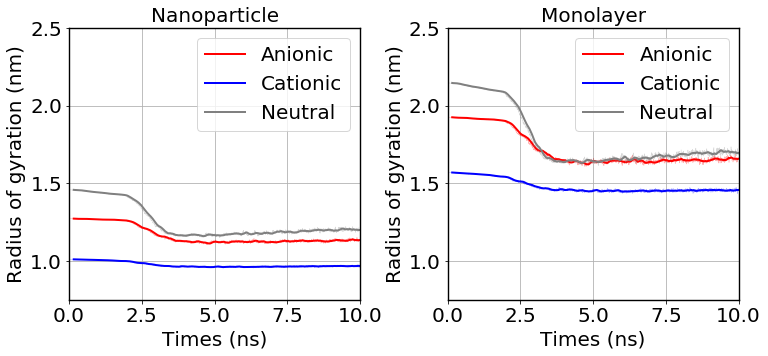

In [32]:
titles = ["Nanoparticle", "Monolayer"]
colors = ['r', 'b', 'gray']
nw=40
fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1, gridspec_kw={'wspace':0.3})
for rog_np, rog_mono, lab, c in zip(all_rogs_np, all_rogs_mono, labels, colors):
    axs[0].plot(times[nw:], ma(rog_np/10, nw), label=lab, lw=2, c=c)
    axs[0].plot(times, rog_np/10, alpha=0.3, lw=0.5, c=c)
    axs[1].plot(times[nw:], ma(rog_mono/10, nw), label=lab, lw=2, c=c)
    axs[1].plot(times, rog_mono/10, alpha=0.3, lw=0.5, c=c)
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize=Z)
    ax.legend(fontsize=Z)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Times (ns)", fontsize=Z)
    ax.set_ylabel("Radius of gyration (nm)", fontsize=Z)
    ax.set_xlim(0,10)
    ax.set_ylim(0.75,2.5)
    ax.grid()
plt.show()
plt.close()